In [1]:
print("Hello World!")

Hello World!


In [98]:
import pandas as pd

housing = pd.read_csv('housing.csv')
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [10]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [99]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [14]:
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [16]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

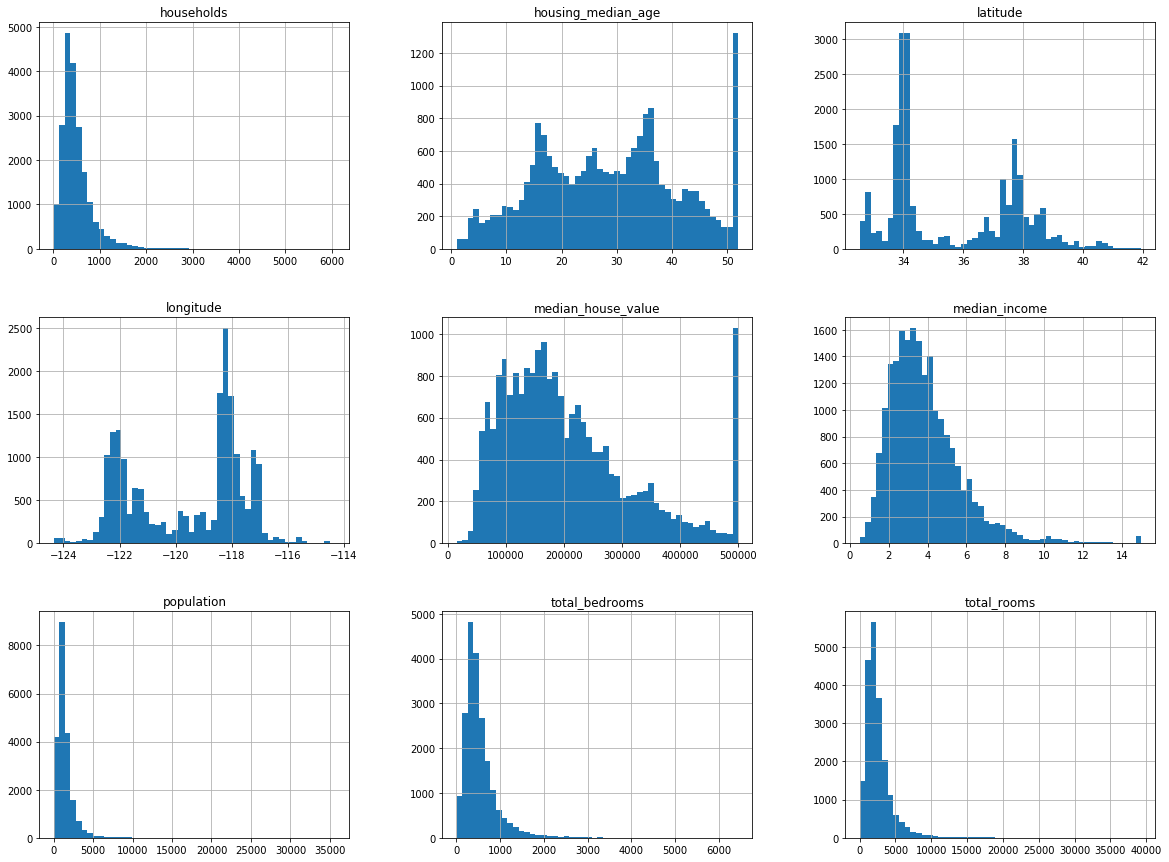

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20, 15))
plt.show()

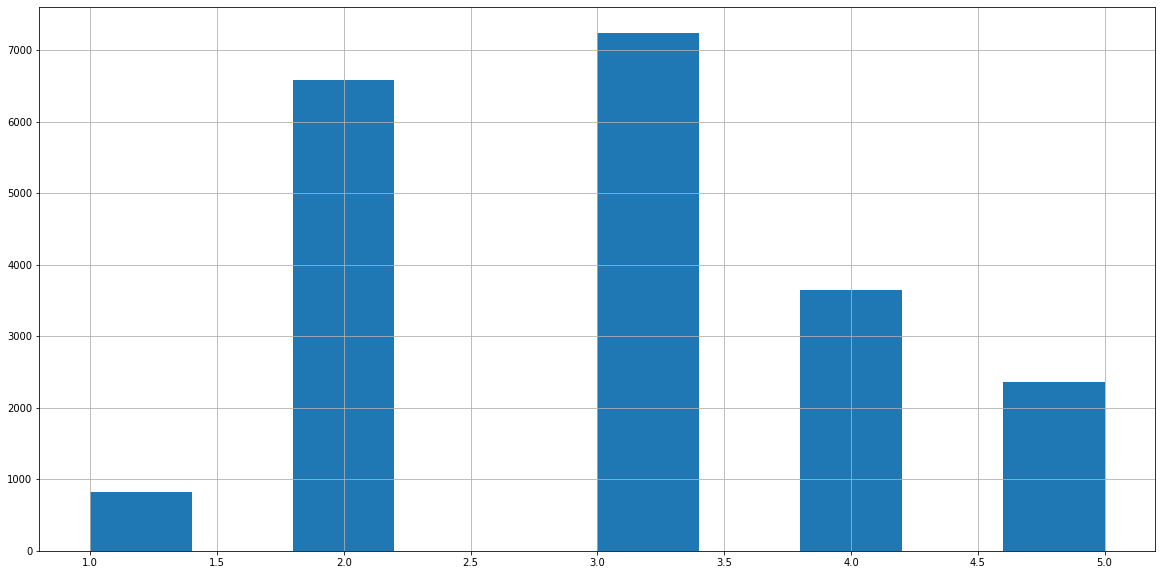

In [28]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing['income_cat'].hist(figsize=(20,10))

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_test_set = housing.loc[test_index]
    strat_train_set = housing.loc[train_index]
    
print(housing['income_cat'].value_counts()/len(housing))

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64


In [30]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

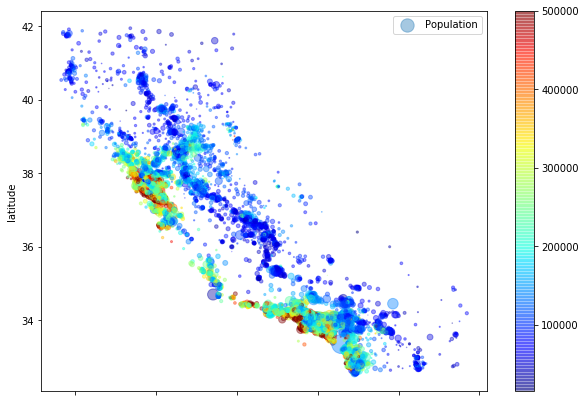

In [39]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha =0.4,
            s=housing['population']/100, label='Population', figsize=(10,7),
            c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [44]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22235780>,
      dtype=object)

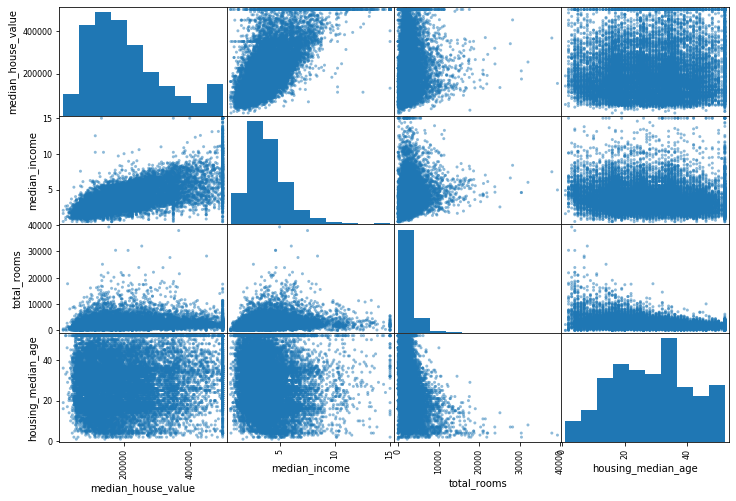

In [48]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


In [113]:
# housing['rooms_per_households'] = housing['total_bedrooms']/ housing['households']
# housing['bedrooms_per_rooms'] = housing['total_bedrooms']/ housing['total_rooms']
# housing['population_per_households'] = housing['population']/housing['households']

# corr_matrix = housing.corr()
# corr_matrix['median_house_value'].sort_values(ascending=False)

In [129]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [102]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median")

In [96]:
housing_num = housing.drop("ocean_proximity", axis = 1)
# imputer.fit(housing_num)

In [58]:
# x = imputer.transform(housing_num)

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# housing_cat = housing['ocean_proximity']
# housing_cat_encoded = encoder.fit_transform(housing_cat)

In [94]:
# housing_cat_encoded

In [103]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# housing_cat_1hot.toarray()

In [68]:
# from sklearn.preprocessing import LabelBinarizer 
# encoder = LabelBinarizer()
# housing_cat_1hot = encoder.fit_transform(housing_cat)
# housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **karg
        self.add_bedrooms_per_room = add_bedrooms_per_room 
        
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)




In [74]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# num_pipeline = Pipeline([('imputer', Imputer(strategy='median')),
#                         ('attribs_adder', CombinedAttributesAdder()),
#                         ('td_scaler', StandardScaler())])
# housing_num_tr = num_pipeline.fit_transform(housing_num)

/Users/mahya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [125]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)


num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), 
                         ('imputer', SimpleImputer(strategy="median")), 
                         ('attribs_adder', CombinedAttributesAdder()), 
                         ('std_scaler', StandardScaler())
                        ])
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), 
                         ('label_binarizer', MyLabelBinarizer())
                        ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), 
                                               ("cat_pipeline", cat_pipeline)
                                              ])


In [127]:
housing_prepared = full_pipeline.fit_transform(housing)

In [130]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_reg_err = mean_squared_error(housing_labels, housing_prediction)
np.sqrt(lin_reg_err)

68628.19819848923

In [135]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [139]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores =np.sqrt(-scores)
tree_rmse_scores

array([68920.76836763, 66472.16661268, 71425.40195118, 70094.99059592,
       70424.73607106, 74127.49384726, 70017.63032141, 71394.55788347,
       75811.57061936, 70861.23464445])

In [141]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean Scores:', scores.mean())
    print('Std Scores:', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68920.76836763 66472.16661268 71425.40195118 70094.99059592
 70424.73607106 74127.49384726 70017.63032141 71394.55788347
 75811.57061936 70861.23464445]
Mean Scores: 70955.05509144231
Std Scores: 2453.7242687044395


In [158]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
forest_reg_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_reg_predictions)
forest_mse = np.sqrt(forest_mse)
forest_mse

19561.601906818396

In [159]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [50141.36385885 47640.30832627 50921.08943207 52659.54280148
 49506.38494424 54204.85834912 49214.04467119 47790.14481191
 53869.80154598 51020.52377426]
Mean Scores: 50696.80625153554
Std Scores: 2193.098737823643


In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [161]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63665.26713240358 {'max_features': 2, 'n_estimators': 3}
56150.00376328426 {'max_features': 2, 'n_estimators': 10}
52815.062381848904 {'max_features': 2, 'n_estimators': 30}
60228.595010754514 {'max_features': 4, 'n_estimators': 3}
52843.078694342505 {'max_features': 4, 'n_estimators': 10}
50676.66160523315 {'max_features': 4, 'n_estimators': 30}
59420.22077388071 {'max_features': 6, 'n_estimators': 3}
52182.30154779005 {'max_features': 6, 'n_estimators': 10}
50150.10158005844 {'max_features': 6, 'n_estimators': 30}
59073.06964702352 {'max_features': 8, 'n_estimators': 3}
52294.03015705682 {'max_features': 8, 'n_estimators': 10}
50056.9324944844 {'max_features': 8, 'n_estimators': 30}
63506.74113176704 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54110.814534991594 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60188.96562536948 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51943.85789899283 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [163]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3910048064231632, 'median_income'),
 (0.14012266726611255, 'INLAND'),
 (0.11010827476674521, 'pop_per_hhold'),
 (0.07050917538889562, 'longitude'),
 (0.06714668787518832, 'latitude'),
 (0.058061639411636536, 'bedrooms_per_room'),
 (0.044616371264117265, 'rooms_per_hhold'),
 (0.04181266814470348, 'housing_median_age'),
 (0.015398814342074232, 'total_rooms'),
 (0.015213168011801614, 'total_bedrooms'),
 (0.014508075829883452, 'population'),
 (0.013649650906123608, 'households'),
 (0.010643722038485353, '<1H OCEAN'),
 (0.004744992082074949, 'NEAR OCEAN'),
 (0.00237851046055462, 'NEAR BAY'),
 (8.077578843997306e-05, 'ISLAND')]

In [166]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) 

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)